# Importing the necessary libraries and modules for the task
1. Numpy for calculating numeraical arrays and values
2. Matplotlib for plotting
3. Scikit-learn for training models and evaluating accuracy scores

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

#Importing the dataset
1. Used OpenML for loading the CIFAR-10 data
2. Loaded the data in X and the labels in y

In [2]:
cifar = fetch_openml('CIFAR_10', version=1)
X, y = cifar.data, cifar.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


#Converting images into grayscale using the grayscale conversion coefficients


In [3]:
import pandas as pd

X = X.astype('float32')
X_array = X.values
grayscale_coefficients = np.array([0.2989, 0.5870, 0.1140])
X_reshaped = X_array.reshape(X_array.shape[0], -1, 3)
X_gray = np.dot(X_reshaped, grayscale_coefficients)
X_gray = X_gray.reshape(X_gray.shape[0], 32, 32).astype('float32')

#Splitting the data and the target into train and test segments (10000)
1. There will be 10,000 data for training
2. The remaining data will be on testing purposes

In [4]:
X_train, y_train = X_gray[:10000], y[:10000]
X_test, y_test = X_gray[10000:12000], y[10000:12000]

#Defining a function for KNN
1. k is hyperparameter
2. KNN classifier is from Scikit-learn
3. X_train is reshaped because KNN classifier only accepts 2D representation of 1D flattened image
4. Split is 5 means 5 folds
5. Calculating the mean for each hyperparameter for each distance metric

In [5]:
def knn_accuracy(k, distance_metric):
    model = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
    return cross_val_score(model, X_train.reshape(X_train.shape[0], -1), y_train, cv=StratifiedKFold(n_splits=5), scoring='accuracy').mean()

#Declaring the values for the knn_accuracy function

In [6]:
k_values = list(range(1, 11))
distance_metrics = ['manhattan', 'euclidean']

#Dictionary comprehension, training model for finding accuracy

In [7]:
accuracies = {metric: [knn_accuracy(k, metric) for k in k_values] for metric in distance_metrics}

#Plotting the accuracy graph

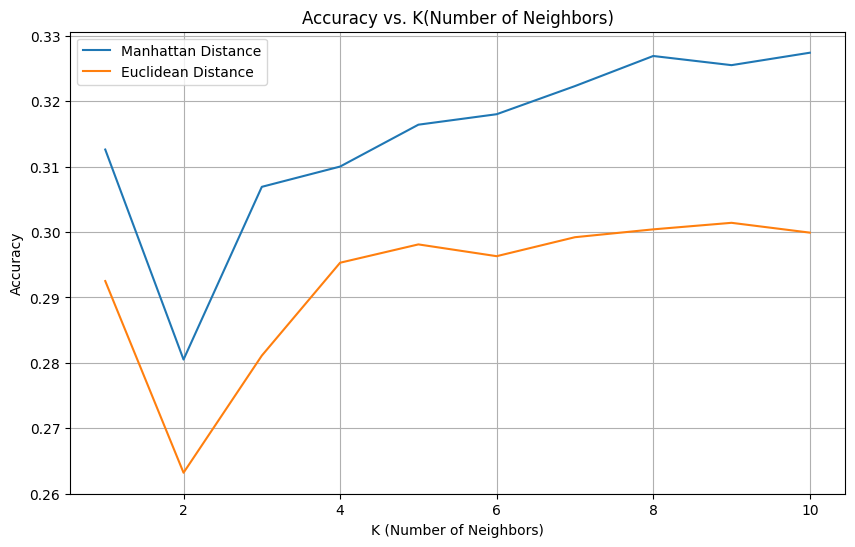

In [8]:
plt.figure(figsize=(10, 6))
for metric in distance_metrics:
    plt.plot(k_values, accuracies[metric], label=f'{metric.capitalize()} Distance')

plt.title('Accuracy vs. K(Number of Neighbors)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

#Finding the best K value for the model

In [9]:
best_k_values = {metric: k_values[np.argmax(accuracies[metric])] for metric in distance_metrics}

print("Best K values:")
for metric in distance_metrics:
    print(f"{metric.capitalize()} Distance: K = {best_k_values[metric]}")


Best K values:
Manhattan Distance: K = 10
Euclidean Distance: K = 9


#Comparison of average accuracy

In [10]:
if accuracies['manhattan'] > accuracies['euclidean']:
    print(f"Manhattan distance {sum(accuracies['manhattan']) / len(accuracies['manhattan'])} outperforms Euclidean distance {sum(accuracies['euclidean']) / len(accuracies['euclidean'])}.")
else:
    print(f"Euclidean distance {sum(accuracies['euclidean']) / len(accuracies['euclidean'])} outperforms Manhattan distance {sum(accuracies['manhattan']) / len(accuracies['manhattan'])}.")

Manhattan distance 0.31465 outperforms Euclidean distance 0.29274000000000006.


#Defining required valriables for the testing

In [11]:
best_k_manhattan = best_k_values['manhattan']
best_k_euclidean = best_k_values['euclidean']
distance_metric_manhattan = 'manhattan'
distance_metric_euclidean = 'euclidean'

#Creating KNN models with the best hyperparameters

In [12]:
knn_model_manhattan = KNeighborsClassifier(n_neighbors=best_k_manhattan, metric=distance_metric_manhattan)
knn_model_euclidean = KNeighborsClassifier(n_neighbors=best_k_euclidean, metric=distance_metric_euclidean)

#Fitting the data model with the initialized parameters

In [13]:
knn_model_manhattan.fit(X_train.reshape(X_train.shape[0], -1), y_train)
knn_model_euclidean.fit(X_train.reshape(X_train.shape[0], -1), y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

#Making predictions on the test images

In [14]:
y_pred_manhattan = knn_model_manhattan.predict(X_test.reshape(X_test.shape[0], -1))
y_pred_euclidean = knn_model_euclidean.predict(X_test.reshape(X_test.shape[0], -1))

#Top 5 class predictions for Manhattan Distance Matrix

In [15]:
top_5_indices_manhattan = knn_model_manhattan.kneighbors(X_test.reshape(X_test.shape[0], -1), n_neighbors=5, return_distance=False)

#Top 5 class predictions for Euclidean Distance Matrix

In [16]:
top_5_indices_euclidean = knn_model_euclidean.kneighbors(X_test.reshape(X_test.shape[0], -1), n_neighbors=5, return_distance=False)

#Top 5 predcitions for Manhattan Distance Matrix

In [51]:
for i in range(5):
    #image_data = X_test[i]
    #plt.imshow(image_data, cmap='gray')
    true_label = y_test[i+10000]
    top_5_labels_manhattan = [y_train[index] for index in top_5_indices_manhattan[i]]

    print(f"Test Image {i + 1}:")
    print(f"True Label: {true_label}")
    print(f"Top 5 Predicted Labels: {top_5_labels_manhattan}\n")


Test Image 1:
True Label: 0
Top 5 Predicted Labels: ['9', '7', '8', '8', '4']

Test Image 2:
True Label: 6
Top 5 Predicted Labels: ['3', '3', '6', '6', '6']

Test Image 3:
True Label: 0
Top 5 Predicted Labels: ['8', '0', '0', '0', '8']

Test Image 4:
True Label: 2
Top 5 Predicted Labels: ['3', '4', '5', '4', '7']

Test Image 5:
True Label: 7
Top 5 Predicted Labels: ['7', '7', '7', '4', '7']



#Top 5 predcitions for Euclidean Distance Matrix

In [52]:
for i in range(5):
    #image_data = X_test[i]
    #plt.imshow(image_data, cmap='gray')
    true_label = y_test[i+10000]
    top_5_labels_manhattan = [y_train[index] for index in top_5_indices_euclidean[i]]

    print(f"Test Image {i + 1}:")
    print(f"True Label: {true_label}")
    print(f"Top 5 Predicted Labels: {top_5_labels_manhattan}\n")

Test Image 1:
True Label: 0
Top 5 Predicted Labels: ['9', '8', '8', '4', '4']

Test Image 2:
True Label: 6
Top 5 Predicted Labels: ['4', '6', '4', '4', '6']

Test Image 3:
True Label: 0
Top 5 Predicted Labels: ['8', '0', '8', '0', '0']

Test Image 4:
True Label: 2
Top 5 Predicted Labels: ['4', '3', '5', '6', '7']

Test Image 5:
True Label: 7
Top 5 Predicted Labels: ['7', '2', '4', '7', '7']



#Discussion
Here, it can be seen that the accuracy of the Manhattan distance is 31% and the accuracy of Euclidean distance matric is about 29%. Here the Manhattan is more accurate because it divides the regions more smoothly and maps the decision surface more organically where the Euclidean does the opposite. So based upon this results, there are two thigs which can be altered. They are how to increase the result and what are the limitations whicih can alter the result.

1. *Improving the result:*

a. The first and foremost thing to do to imrove the reuslt is training more images. In this experiment, because of the resource, the number of training images was 10000 and 2000 was testing images. Traning more images can result more accurate model.

b. Taking a large variant of K (Hyperparameter) can result a more accurate result. The range was 1 to 10. So the best one was 10 for Manhattan and 9 for Euclidean. But the model was test for a larger variant of K, the result was different. As far as I remembered, it was about 21 for Manhattan and 20 or 19 for Euclidean. As the best parameters changes, the accuracy also increased.

c. Number of folds is a cruicial point of increasing the accuracy level. It can detect a more optimized value of K whcih dramatically increases the possibility of getting a more accurate value. In this implementation, the number of folds was 5.

d. Preprocessing can also increase the result. Caring about the unstable data and making it stable can reduce the error factors like outliers.

2. *Limitations*

a. The fore and foremost limitation is resrouce and the quality of the dataset. Making these two things better can cause a good training segment.

b. Optimized value of K can be a huge factor. By taking small value, there will be chance that the distace matrices cannot grasp all of the regional points. Also, taking a larger value for K can cause the point to be placed in a outlier catagory. So taking a bad value for K can be a limitation.

There are more ways to alter the data but these are the major causes.